In [155]:
import pandas as pd
import numpy as np
import unicodedata
import re

from bs4 import BeautifulSoup
import requests
import os
import json

import os
import unicodedata
import re
import json

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.model_selection

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import scipy.stats as stats
from scipy.stats import pearsonr

import seaborn as sns

import prepare as prep

# Shawn Acquire

In [3]:
df = prep.get_data('all_books.csv')

# Shawn Prepare

In [6]:
prep.clean_article(df, 'title')
prep.clean_article(df, 'summary')
df1 = pd.read_csv('books_feat_on_NYBS.csv', index_col=0)
prep.clean_article(df1, 'Book')
ser = df1['cleaned_Book']
prep.creat_tar(df, ser)
df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)
df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)
df['sentiment'] = df['compound'].apply(prep.get_sentiment)

# Shawn Explore

In [7]:
def split(df):
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df.target)
    return train, test

In [8]:
train, test = split(df)

In [55]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
3248,Zen in the Art of Archery,The path to achieving Zen (a balance between t...,1948,Eugen Herrigel,745,13640,81.0,Philosophy,3.99,[],zen in the art of archery,the path to achieving zen a balance between th...,unsuccessful,path achieve zen balance body mind brilliantly...,0.025,0.873,0.101,0.8807,very positive
1767,Sharks in the Time of Saviors,"In 1995 Kailua-Kona, Hawaii, on a rare family ...",2020,Kawai Strong Washburn,2493,16032,376.0,Fiction,3.85,[],sharks in the time of saviors,"in 1995 kailuakona, hawaii, on a rare family v...",unsuccessful,kailuakona hawaii rare family vacation sevenye...,0.098,0.744,0.158,0.9655,very positive
2494,The Rotters' Club,"Birmingham, England, c. 1973: industrial strik...",2001,Jonathan Coe,821,13374,415.0,Fiction,3.96,NaN,the rotters' club,"birmingham, england, c. 1973 industrial strike...",unsuccessful,birmingham england industrial strike bad pop m...,0.161,0.662,0.177,0.5378,very positive
2437,The Past,The Past is the first book in the VanWest seri...,2020,Kenneth Thomas,211,690,195.0,Science Fiction,3.77,NaN,the past,the past is the first book in the vanwest seri...,unsuccessful,past first vanwest series enforcer live dystop...,0.076,0.881,0.044,-0.2796,negative
2551,The Soloist,"Now a major motion picture-""An intimate por...",2008,Steve López,1544,9944,289.0,Nonfiction,3.91,NaN,the soloist,\n\n now a major motion picturean intimate por...,unsuccessful,major motion picturean intimate portrait menta...,0.123,0.794,0.083,-0.4576,negative


# Question #2

In [16]:
# Subset df split of train into only negative values of 'sentiment' column
df_neg = train[train['sentiment'].isin(['negative', 'very negative'])]

# Tokenize words
words = df_neg['cleaned_summary'].str.lower().str.cat(sep=' ').split()

# Create a list of additional stopwords
additional_stopwords = ['.','1']

# Add the additional stopwords to the default set of stopwords
stop_words = set(stopwords.words('english') + additional_stopwords)

# Remove stopwords
words = [word for word in words if word not in stop_words]

# Get frequency distribution of words, bigrams, and trigrams
freq_dist = nltk.FreqDist(words)
freq_dist_bigram = nltk.FreqDist(nltk.bigrams(words))
freq_dist_trigram = nltk.FreqDist(nltk.trigrams(words))

# Get 50 most common words, bigrams, and trigrams
most_common_words = freq_dist.most_common(50)
most_common_bigram = freq_dist_bigram.most_common(50)
most_common_trigram = freq_dist_trigram.most_common(50)

# Visualize

In [54]:
# subset df split of train into only negative values of 'sentiment' column
df_neg = train[train['sentiment'] == 'negative']

In [48]:
# subset df split of train into only negative values of 'sentiment' column
df_neg = train[train['sentiment'] == 'negative']

# Tokenize words
words = df_neg['cleaned_summary'].str.lower().str.cat(sep=' ').split()

# Create a list of additional stopwords
additional_stopwords = ['.']

# Add the additional stopwords to the default set of stopwords
stop_words = set(stopwords.words('english') + additional_stopwords)

# Remove stopwords
words = [word for word in words if word not in stop_words]

# Get frequency distribution of ngrams
freq_dist = nltk.FreqDist(words)
freq_dist_bigram = nltk.FreqDist(nltk.bigrams(words))
freq_dist_trigram = nltk.FreqDist(nltk.trigrams(words))

# Get 50 most common words
most_common = freq_dist.most_common(50)
most_common_bigram = freq_dist_bigram.most_common(50)
most_common_trigram = freq_dist_trigram.most_common(50)

# convert to dataframe for visualizing ease
df_common_words = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
df_common_bigram = pd.DataFrame(most_common_bigram, columns=['Bigram', 'Frequency'])
df_common_trigram = pd.DataFrame(most_common_trigram, columns=['Trigram', 'Frequency'])

# visual output
df_common_words.head(15)
df_common_bigram.head(15)
df_common_trigram.head(15)

,Trigram,Frequency
0,"(new, york, times)",82
1,"(york, times, bestselling)",60
2,"(times, bestselling, author)",39
3,"(alternate, cover, edition)",17
4,"(new, york, city)",16
5,"(world, war, ii)",14
6,"(lieutenant, eve, dallas)",12
7,"(world, war, ii,)",11
8,"(cover, edition, found)",9
9,"(librarian's, note, alternate)",9


In [50]:
def question_2_visuals(df):
    # create the horizontal count plot
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.barplot(x=df.columns[1], y=df.columns[0], data=df.head(15), color="skyblue")
    plt.title(f'Frequency of {df.columns[0]}')
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[0])
    plt.show()

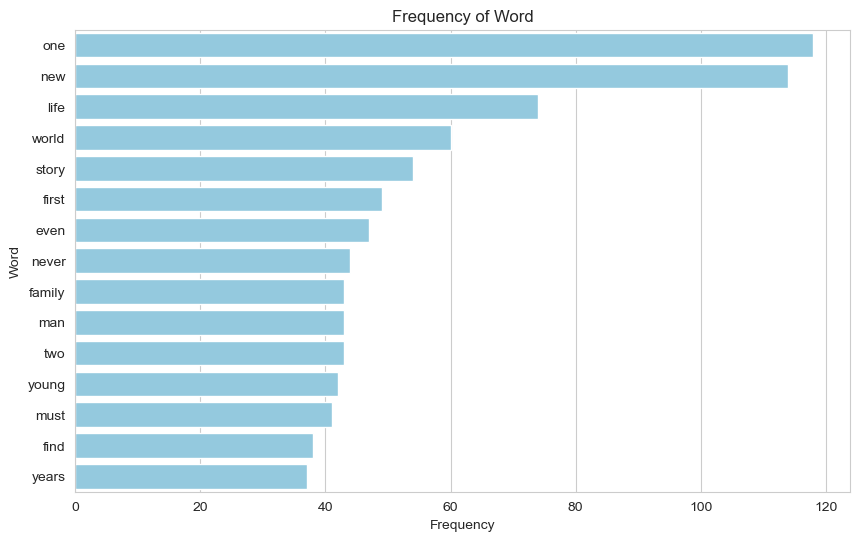

In [51]:
question_2_visuals(df_common_words)

In [56]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
3248,Zen in the Art of Archery,The path to achieving Zen (a balance between t...,1948,Eugen Herrigel,745,13640,81.0,Philosophy,3.99,[],zen in the art of archery,the path to achieving zen a balance between th...,unsuccessful,path achieve zen balance body mind brilliantly...,0.025,0.873,0.101,0.8807,very positive
1767,Sharks in the Time of Saviors,"In 1995 Kailua-Kona, Hawaii, on a rare family ...",2020,Kawai Strong Washburn,2493,16032,376.0,Fiction,3.85,[],sharks in the time of saviors,"in 1995 kailuakona, hawaii, on a rare family v...",unsuccessful,kailuakona hawaii rare family vacation sevenye...,0.098,0.744,0.158,0.9655,very positive
2494,The Rotters' Club,"Birmingham, England, c. 1973: industrial strik...",2001,Jonathan Coe,821,13374,415.0,Fiction,3.96,NaN,the rotters' club,"birmingham, england, c. 1973 industrial strike...",unsuccessful,birmingham england industrial strike bad pop m...,0.161,0.662,0.177,0.5378,very positive
2437,The Past,The Past is the first book in the VanWest seri...,2020,Kenneth Thomas,211,690,195.0,Science Fiction,3.77,NaN,the past,the past is the first book in the vanwest seri...,unsuccessful,past first vanwest series enforcer live dystop...,0.076,0.881,0.044,-0.2796,negative
2551,The Soloist,"Now a major motion picture-""An intimate por...",2008,Steve López,1544,9944,289.0,Nonfiction,3.91,NaN,the soloist,\n\n now a major motion picturean intimate por...,unsuccessful,major motion picturean intimate portrait menta...,0.123,0.794,0.083,-0.4576,negative


In [61]:
def get_most_common_negative_ngrams(train, n, top_n):
    '''
        Returns a Pandas DataFrame with the most common n-grams for negative reviews in the given train dataset.
    
        Params:
        --------
            train (Pandas DataFrame): 
                The dataset to extract the negative reviews from.
            n (int): 
                The n-gram size to extract (1 for unigrams, 2 for bigrams, 3 for trigrams).
            top_n (int): 
                The number of rows to return with the most common n-grams.

        Returns:
        --------
            A Pandas DataFrame with two columns: 
                the n-gram words and their frequency count. 
                
            The DataFrame has a total of top_n rows, which are the most 
            common n-grams in the negative reviews. The name of the columns depend on the
            n-gram size.

    '''
    # Subset df split of train into only negative values of 'sentiment' column
    df_neg = train[train['sentiment'].isin(['negative', 'very negative'])]
    
    # Tokenize words
    words = df_neg['cleaned_summary'].str.lower().str.cat(sep=' ').split()

    # Create a list of additional stopwords
    additional_stopwords = ['.']

    # Add the additional stopwords to the default set of stopwords
    stop_words = set(stopwords.words('english') + additional_stopwords)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Get frequency distribution of ngrams
    if n == 1:
        freq_dist = nltk.FreqDist(words)
        most_common = freq_dist.most_common(top_n)
        df_common = pd.DataFrame(most_common, columns=['Words', 'Frequency'])
    elif n == 2:
        freq_dist_bigram = nltk.FreqDist(nltk.bigrams(words))
        most_common = freq_dist_bigram.most_common(top_n)
        df_common = pd.DataFrame(most_common, columns=['Bigrams', 'Frequency'])
    elif n == 3:
        freq_dist_trigram = nltk.FreqDist(nltk.trigrams(words))
        most_common = freq_dist_trigram.most_common(top_n)
        df_common = pd.DataFrame(most_common, columns=['Trigrams', 'Frequency'])
    else:
        print('Invalid value for n')

    return df_common

In [62]:
def explore_question_2_visuals(df):
    # create the horizontal count plot
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.barplot(x=df.columns[1], y=df.columns[0], data=df.head(15), color="skyblue")
    plt.title(f'Frequency of {df.columns[0]}')
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[0])
    plt.show()

In [66]:
def explore_question_2():
    top_15_negative_words_df = get_most_common_negative_ngrams(train,1,15)
    top_15_negative_bigrams_df = get_most_common_negative_ngrams(train,2,15)
    top_15_negative_trigrams_df = get_most_common_negative_ngrams(train,3,15)
    
    question_2_visuals(top_15_negative_words_df)
    question_2_visuals(top_15_negative_bigrams_df)
    question_2_visuals(top_15_negative_trigrams_df)

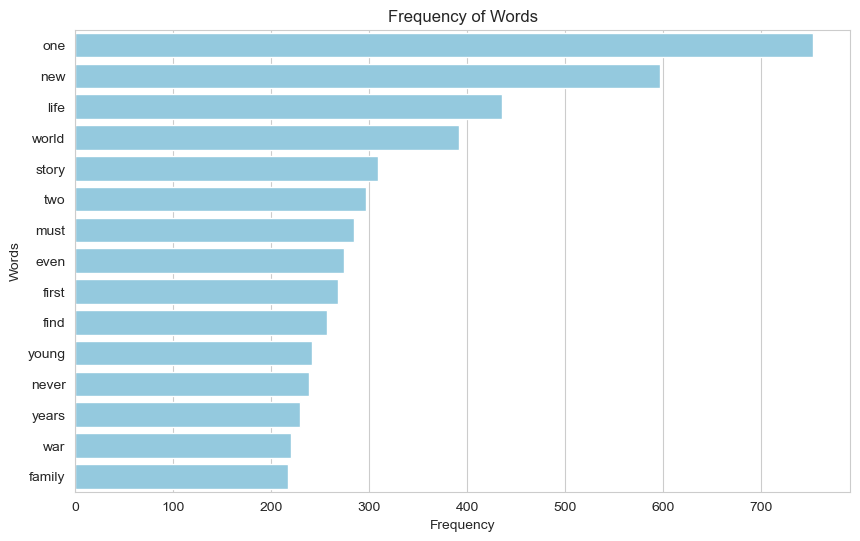

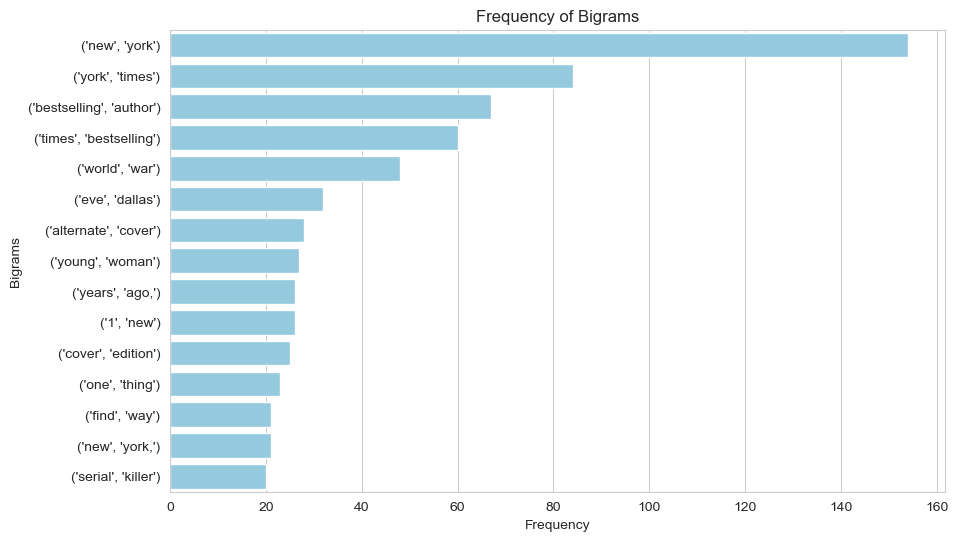

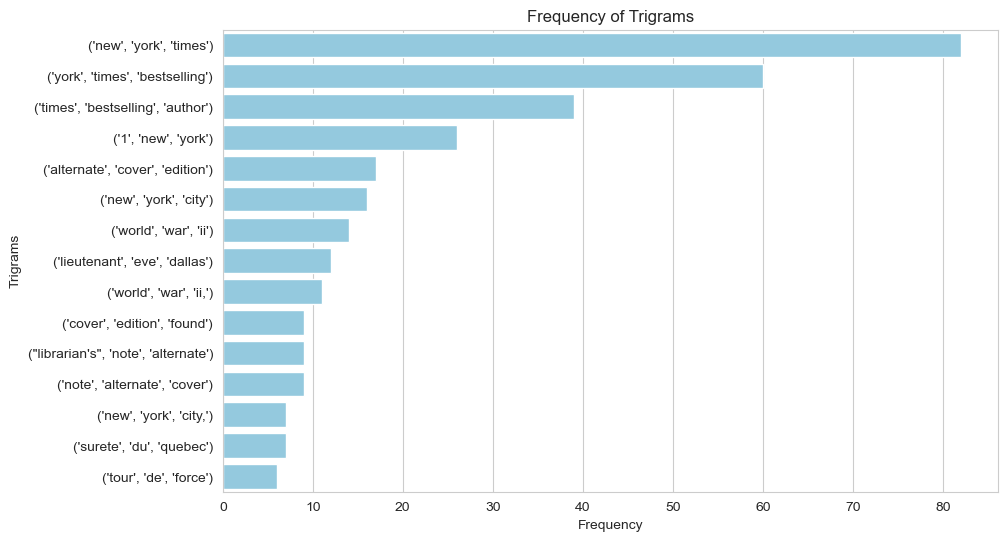

In [64]:
explore_question_2()

In [67]:
train.columns

Index(['title', 'summary', 'year_published', 'author', 'review_count',
       'number_of_ratings', 'length', 'genre', 'rating', 'reviews',
       'cleaned_title', 'cleaned_summary', 'target', 'lemmatized_summary',
       'neg', 'neutral', 'pos', 'compound', 'sentiment'],
      dtype='object')

In [68]:
train.shape

(3048, 19)

In [69]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
3248,Zen in the Art of Archery,The path to achieving Zen (a balance between t...,1948,Eugen Herrigel,745,13640,81.0,Philosophy,3.99,[],zen in the art of archery,the path to achieving zen a balance between th...,unsuccessful,path achieve zen balance body mind brilliantly...,0.025,0.873,0.101,0.8807,very positive
1767,Sharks in the Time of Saviors,"In 1995 Kailua-Kona, Hawaii, on a rare family ...",2020,Kawai Strong Washburn,2493,16032,376.0,Fiction,3.85,[],sharks in the time of saviors,"in 1995 kailuakona, hawaii, on a rare family v...",unsuccessful,kailuakona hawaii rare family vacation sevenye...,0.098,0.744,0.158,0.9655,very positive
2494,The Rotters' Club,"Birmingham, England, c. 1973: industrial strik...",2001,Jonathan Coe,821,13374,415.0,Fiction,3.96,NaN,the rotters' club,"birmingham, england, c. 1973 industrial strike...",unsuccessful,birmingham england industrial strike bad pop m...,0.161,0.662,0.177,0.5378,very positive
2437,The Past,The Past is the first book in the VanWest seri...,2020,Kenneth Thomas,211,690,195.0,Science Fiction,3.77,NaN,the past,the past is the first book in the vanwest seri...,unsuccessful,past first vanwest series enforcer live dystop...,0.076,0.881,0.044,-0.2796,negative
2551,The Soloist,"Now a major motion picture-""An intimate por...",2008,Steve López,1544,9944,289.0,Nonfiction,3.91,NaN,the soloist,\n\n now a major motion picturean intimate por...,unsuccessful,major motion picturean intimate portrait menta...,0.123,0.794,0.083,-0.4576,negative


In [71]:
train['target'].value_counts()

unsuccessful    2919
best seller      129
Name: target, dtype: int64

# More Explore Question

What is the distribution of the ratings and reviews count?

What is the distribution of sentiment scores?

Who are the top authors in terms of book count?

What are the most popular genres and their frequency?

How does the rating correlate with the number of reviews?

What is the average book length and its distribution?

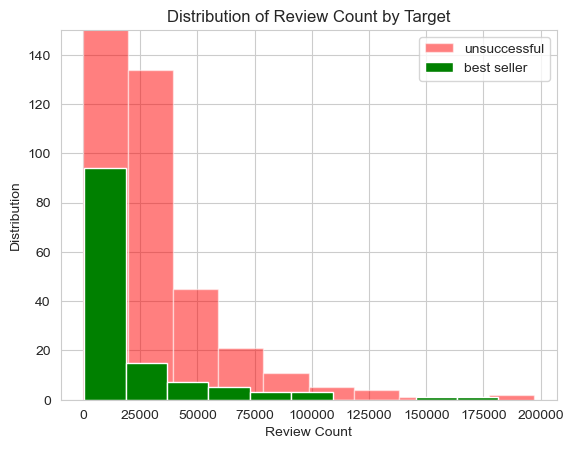

In [86]:
# Create histogram with two different colors for the two targets
plt.hist(df_targets[train['target'] == 'unsuccessful']['review_count'], color='red', label='unsuccessful', alpha=0.5)
plt.hist(df_targets[train['target'] == 'best seller']['review_count'], color='green', label='best seller')

# Set y-limit
plt.ylim([0, 150])

# Add titles and labels
plt.title('Distribution of Review Count by Target')
plt.xlabel('Review Count')
plt.ylabel('Distribution')
plt.legend()

# Show the plot
plt.show()

In [87]:
df_target=train[train['target'] == 'best seller']

In [92]:
df_target['author'].value_counts().head(10)

J.D. Robb          12
Stephen King       12
Louise Penny        7
Nicholas Sparks     6
Janet Evanovich     5
Dan Brown           4
Jodi Picoult        3
Kristin Hannah      3
E.L. James          3
Robert Jordan       3
Name: author, dtype: Int64

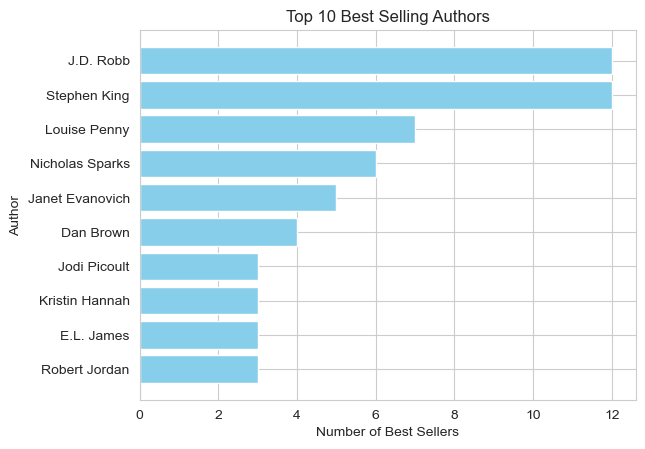

In [96]:
top_authors = df_target['author'].value_counts().head(10)

plt.barh(y=top_authors.index, width=top_authors.values, color='skyblue')
plt.title('Top 10 Best Selling Authors')
plt.xlabel('Number of Best Sellers')
plt.ylabel('Author')
plt.gca().invert_yaxis()  # invert the y-axis to show highest counts at the top
plt.show()


In [97]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
3248,Zen in the Art of Archery,The path to achieving Zen (a balance between t...,1948,Eugen Herrigel,745,13640,81.0,Philosophy,3.99,[],zen in the art of archery,the path to achieving zen a balance between th...,unsuccessful,path achieve zen balance body mind brilliantly...,0.025,0.873,0.101,0.8807,very positive
1767,Sharks in the Time of Saviors,"In 1995 Kailua-Kona, Hawaii, on a rare family ...",2020,Kawai Strong Washburn,2493,16032,376.0,Fiction,3.85,[],sharks in the time of saviors,"in 1995 kailuakona, hawaii, on a rare family v...",unsuccessful,kailuakona hawaii rare family vacation sevenye...,0.098,0.744,0.158,0.9655,very positive
2494,The Rotters' Club,"Birmingham, England, c. 1973: industrial strik...",2001,Jonathan Coe,821,13374,415.0,Fiction,3.96,NaN,the rotters' club,"birmingham, england, c. 1973 industrial strike...",unsuccessful,birmingham england industrial strike bad pop m...,0.161,0.662,0.177,0.5378,very positive
2437,The Past,The Past is the first book in the VanWest seri...,2020,Kenneth Thomas,211,690,195.0,Science Fiction,3.77,NaN,the past,the past is the first book in the vanwest seri...,unsuccessful,past first vanwest series enforcer live dystop...,0.076,0.881,0.044,-0.2796,negative
2551,The Soloist,"Now a major motion picture-""An intimate por...",2008,Steve López,1544,9944,289.0,Nonfiction,3.91,NaN,the soloist,\n\n now a major motion picturean intimate por...,unsuccessful,major motion picturean intimate portrait menta...,0.123,0.794,0.083,-0.4576,negative


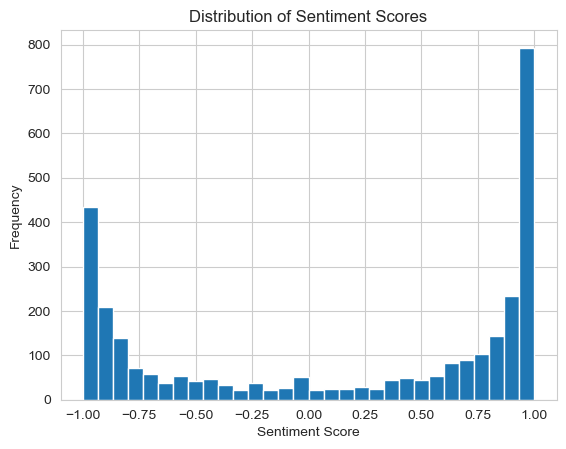

In [98]:
# Create a histogram of sentiment scores
plt.hist(train['compound'], bins=30)

# Add titles and labels
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

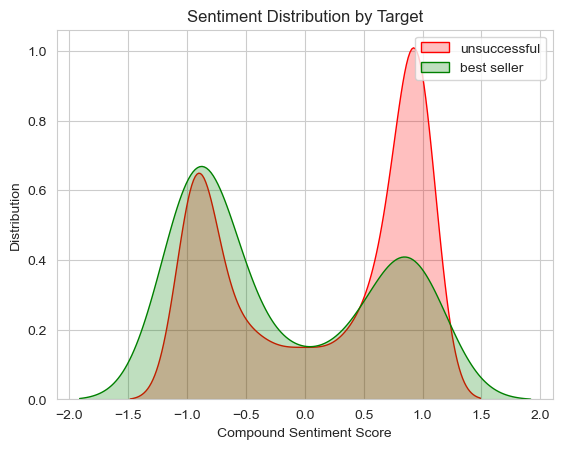

In [100]:
# Subset the dataframe by target
df_unsuccessful = train[train['target'] == 'unsuccessful']
df_best_seller = train[train['target'] == 'best seller']

# Plot the distribution with hue by 'target'
sns.kdeplot(df_unsuccessful['compound'], shade=True, color='red', label='unsuccessful')
sns.kdeplot(df_best_seller['compound'], shade=True, color='green', label='best seller')

# Add title and labels
plt.title('Sentiment Distribution by Target')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Distribution')
plt.legend()

# Show the plot
plt.show()

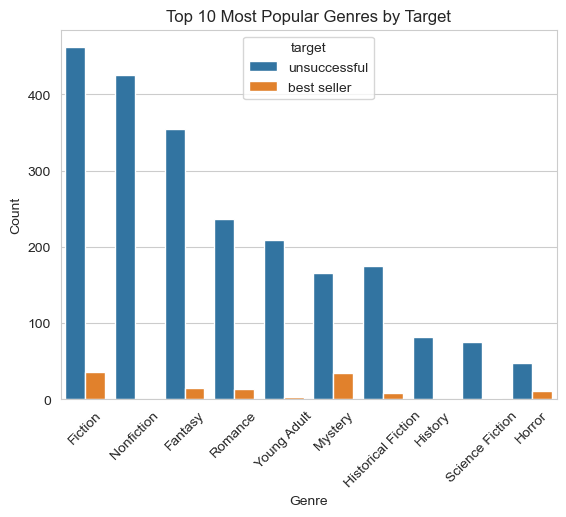

In [99]:
sns.countplot(x='genre', hue='target', data=train, order=train['genre'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Popular Genres by Target')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [101]:
# Select the relevant columns
ratings_reviews_df = train[['rating', 'review_count']]

# Remove any rows with missing data
ratings_reviews_df.dropna(inplace=True)

/var/folders/kx/y9k75c0504q4cdb8ztj47k840000gn/T/ipykernel_31395/2534769389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_reviews_df.dropna(inplace=True)


In [103]:
train.columns

Index(['title', 'summary', 'year_published', 'author', 'review_count',
       'number_of_ratings', 'length', 'genre', 'rating', 'reviews',
       'cleaned_title', 'cleaned_summary', 'target', 'lemmatized_summary',
       'neg', 'neutral', 'pos', 'compound', 'sentiment'],
      dtype='object')

In [104]:
ratings_reviews_df.columns

Index(['rating', 'review_count'], dtype='object')

In [105]:
# Calculate the correlation coefficient
r = np.corrcoef(ratings_reviews_df['rating'], ratings_reviews_df['review_count'])[0,1]

print('Correlation coefficient:', r)

Correlation coefficient: 0.11691418695118976


In [107]:
# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(train['rating'], train['review_count'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr)
print("P-value:", p_value)

Pearson correlation coefficient: 0.11691418695118949
P-value: 9.528683720573955e-11


In [108]:
from scipy import stats

def evaluate_hypothesis(data, x_var, y_var, alpha=0.05):
    """
    Evaluate the null hypothesis that there is no correlation between two variables in a dataset.

    Parameters:
    data (Pandas DataFrame): The dataset to use for the analysis.
    x_var (str): The name of the first variable to use in the analysis.
    y_var (str): The name of the second variable to use in the analysis.
    alpha (float): The significance level for the hypothesis test.

    Returns:
    result (str): A string indicating whether to reject or fail to reject the null hypothesis.
    r (float): The correlation coefficient between the two variables.
    p (float): The p-value of the hypothesis test.
    """

    # Compute the correlation coefficient and p-value
    r, p = stats.pearsonr(data[x_var], data[y_var])

    # Define the null and alternative hypotheses
    null_hypothesis = f"There is no correlation between {x_var} and {y_var}."
    alt_hypothesis = f"There is a correlation between {x_var} and {y_var}."

    # Print the null and alternative hypotheses
    print("Null hypothesis:", null_hypothesis)
    print("Alternative hypothesis:", alt_hypothesis)

    # Determine whether to reject the null hypothesis
    if p < alpha:
        result = f"Reject the null hypothesis. There is sufficient evidence to conclude that {alt_hypothesis}."
    else:
        result = f"Fail to reject the null hypothesis. There is not sufficient evidence to conclude that {alt_hypothesis}."

    return result, r, p

In [109]:
evaluate_hypothesis(train,'rating','review_count')

Null hypothesis: There is no correlation between rating and review_count.
Alternative hypothesis: There is a correlation between rating and review_count.


('Reject the null hypothesis. There is sufficient evidence to conclude that There is a correlation between rating and review_count..',
 0.11691418695118949,
 9.528683720573955e-11)

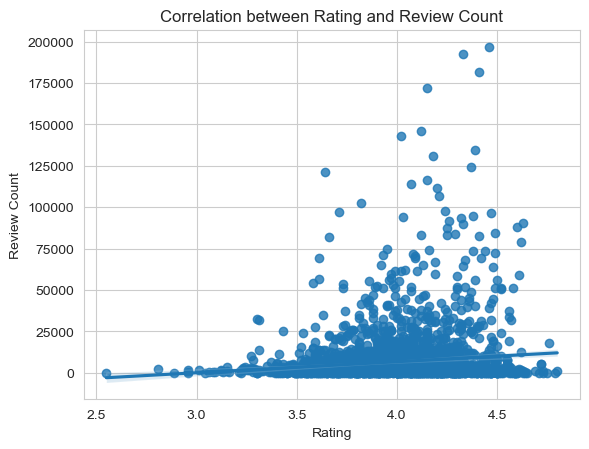

In [110]:
# Create scatter plot with regression line
sns.regplot(data=train, x='rating', y='review_count')

# Add title and labels
plt.title('Correlation between Rating and Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')

# Show the plot
plt.show()

In [ ]:
# What is the average book length and its distribution?

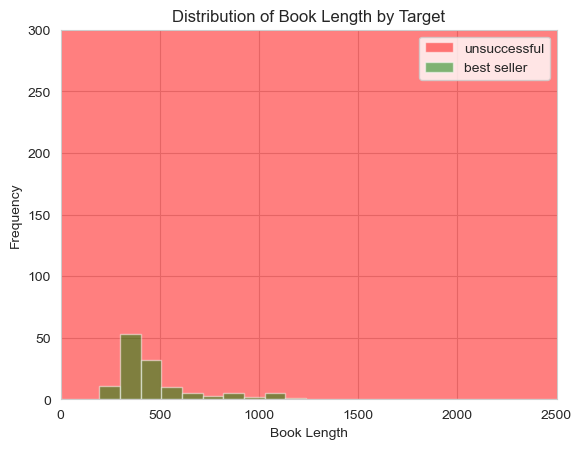

In [150]:
# Create histogram with two different colors for the two targets
plt.hist(train[train['target'] == 'unsuccessful']['length'], color='red', alpha=0.5, label='unsuccessful')
plt.hist(train[train['target'] == 'best seller']['length'], color='green', alpha=0.5, label='best seller')

# Add titles and labels
plt.title('Distribution of Book Length by Target')
plt.xlabel('Book Length')
plt.ylabel('Frequency')
plt.legend()
# Set y-limit
plt.ylim([0, 300])
# Set x-limit
plt.xlim([0, 2500])
# Show the plot
plt.show()

In [ ]:
def avg_book_length_distribution_by_target(train):
    '''
    # What is the average book length and its distribution?
    '''
    
    # Create histogram with two different colors for the two targets
    plt.hist(train[train['target'] == 'unsuccessful']['length'], color='red', alpha=0.5, label='unsuccessful')
    plt.hist(train[train['target'] == 'best seller']['length'], color='green', alpha=0.5, label='best seller')

    # Add titles and labels
    plt.title('Distribution of Book Length by Target')
    plt.xlabel('Book Length')
    plt.ylabel('Frequency')
    plt.legend()
    # Set y-limit
    plt.ylim([0, 300])
    # Set x-limit
    plt.xlim([0, 2500])
    # Show the plot
    plt.show()

In [154]:
# subset the data into the different groups based on 'target'
group1 = train[train['target'] == 'unsuccessful']['length']
group2 = train[train['target'] == 'best seller']['length']

In [190]:
from scipy.stats import ttest_ind

# Split the book length data into two groups based on book success
success_lengths = train[train['target'] == 'best seller']['length']
failure_lengths = train[train['target'] == 'unsuccessful']['length']

In [191]:
print(success_lengths.var())
print(failure_lengths.var())

43863.60667416573
1.2975996602459309e+37


In [192]:
# Perform a two-sample T-test to compare the means of the two groups
t, p = ttest_ind(failure_lengths, success_lengths, equal_var=False)
t, p / 2

# Print the T-statistic and p-value
print('T-statistic:', t_stat)
print('P-value:', p_val)

T-statistic: nan
P-value: nan
